In [1]:
import pandas as pd
import sqlite3

In [2]:
DB_NAME = '../data/checking-logs.sqlite'
conn = sqlite3.connect(DB_NAME)

query1 = """
SELECT 
   timestamp AS datetime_commit
FROM 
    checker
WHERE uid LIKE 'user_%';

"""
query2 = """
SELECT 
   datetime AS datetime_views
FROM 
    pageviews
WHERE uid LIKE 'user_%';

"""


data_commits = pd.read_sql(query1,conn)
data_views = pd.read_sql(query2,conn)
conn.close()

data_commits['datetime_commit'] = pd.to_datetime(data_commits['datetime_commit']).dt.date
data_views['datetime_views'] = pd.to_datetime(data_views['datetime_views']).dt.date



commit_counts = data_commits['datetime_commit'].value_counts().sort_index()


commit_counts = commit_counts.rename_axis('date').reset_index(name='commits')

view_counts = data_views['datetime_views'].value_counts().sort_index()
view_counts = view_counts.rename_axis('date').reset_index(name='views')

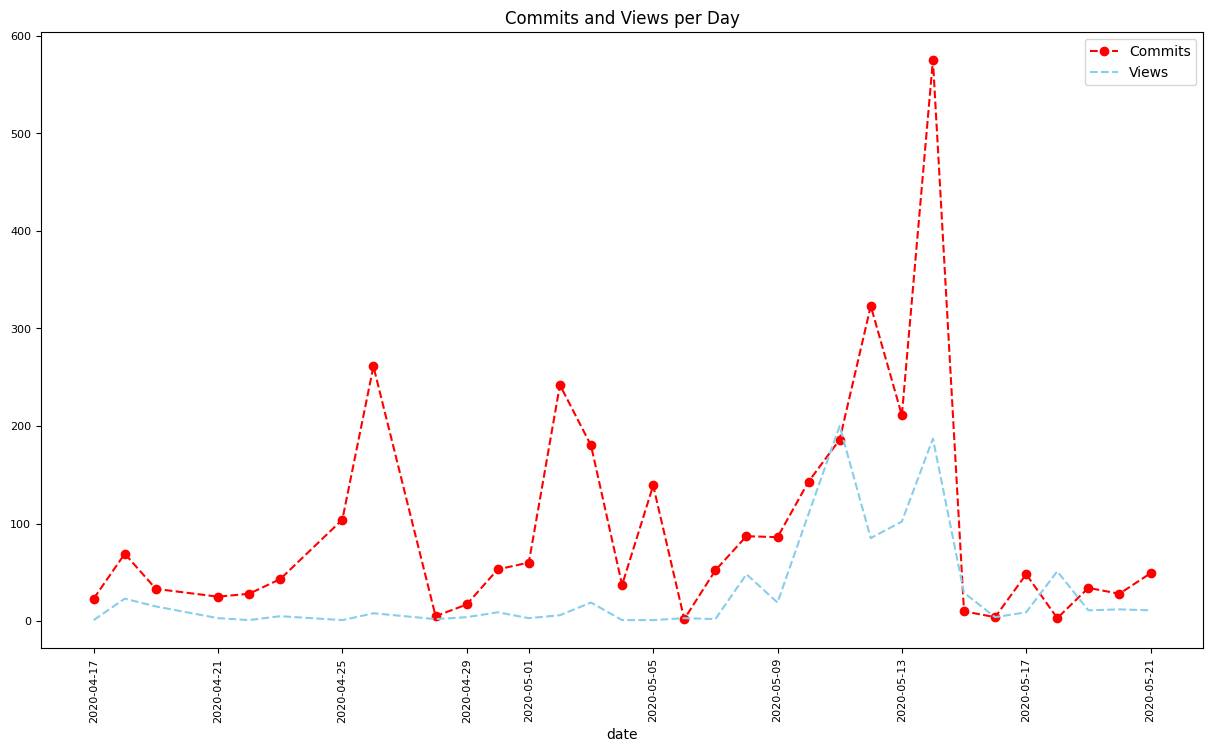

In [3]:
df = pd.merge(view_counts,commit_counts,on='date').fillna(0).sort_values('date')
graph = df.plot(x='date', y=['commits', 'views'], kind='line', figsize=(15, 8),fontsize=8, title='Commits and Views per Day', rot=90)

lines = graph.get_lines()
lines[0].set_color('red')
lines[0].set_linestyle('--')
lines[0].set_marker('o')

lines[1].set_color('skyblue')
lines[1].set_linestyle('--')
lines[1].set_label('views')

graph.legend(['Commits', 'Views']);

How many times was the number of views larger than 150?

The answer is 2. 